# Generation of Investment Data with Python
## Author: Daniel Covarrubias

In [2]:
########################
#
# 1) Identify Symbols form API dumbstock
# 2) Pull daily Price Data for last 365 days via Yahoo
# 3) Identify Metric(s)
# 4) Identify correlations/significance
# 5) Build Historical Model on Training Set
# 6) Test Model on recent data
# 7) Use TF or sklearn
# 8) Build App on AWS or GCP to monitor realtime data
#
########################

In [181]:
########################
# Load packages 
########################

import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix


In [77]:
########################
# Get Ticker Data 
########################

investData = pd.read_csv('https://dumbstockapi.com/stock?format=csv&countries=US')

In [88]:
#########################
# Extract Single Ticker
#########################

investData.loc[investData.ticker == 'IBIO']
myTicker = investData.loc[investData.ticker == 'IBIO'].ticker
myTicker

3164    IBIO
Name: ticker, dtype: object

In [100]:
#########################
# Create Array with Tickers
#########################

myTickers = ['AGRX', 'ONTX', 'IBIO', 'SRRA']
myTickers

'AGRX'

In [167]:
#########################
# Extract Single Series
#########################

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 1, 11)

#########################
# here arbirtraty ticker input
# note that excluding "end" will extract current data
#########################

df = web.DataReader(myTicker, 'yahoo', start)
# df.describe()

In [175]:
#########################
# Extract Multiple Series
#########################

outDF = []

for i in myTickers:  
    df = web.DataReader(myTickers, 'yahoo', start)
    calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

SyntaxError: 'return' outside function (<ipython-input-175-d5fed71a25d0>, line 11)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBE0559E10>,
      dtype=object)

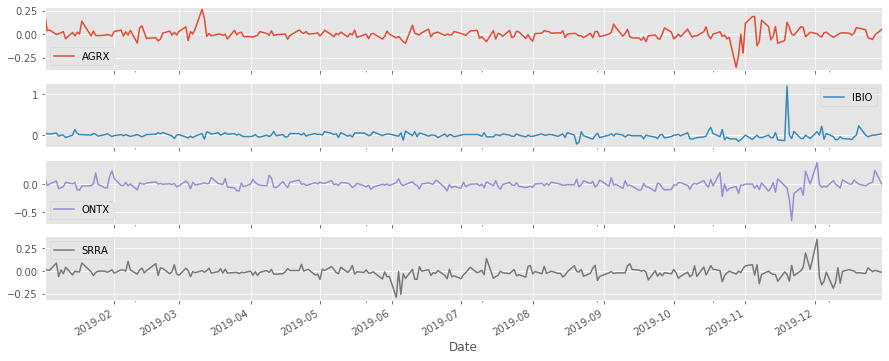

In [169]:
# calPerChange = []
calPerChange.head()
calPerChange.plot(subplots=True, figsize=(15,6))

In [170]:
corr = calPerChange.corr()
corr

Symbols,AGRX,IBIO,ONTX,SRRA
Symbols,,,,
AGRX,1.000000,0.175137,0.036514,0.082049
IBIO,0.175137,1.000000,-0.001514,-0.021166
ONTX,0.036514,-0.001514,1.000000,0.218185
SRRA,0.082049,-0.021166,0.218185,1.000000


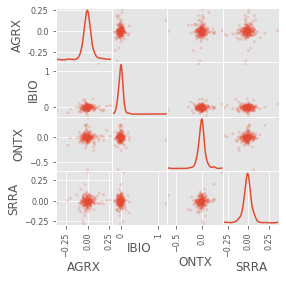

In [183]:
scatter_matrix(calPerChange, diagonal='kde', alpha=0.2, figsize=(4, 4));

Text(0, 0.5, 'Returns SRRA')

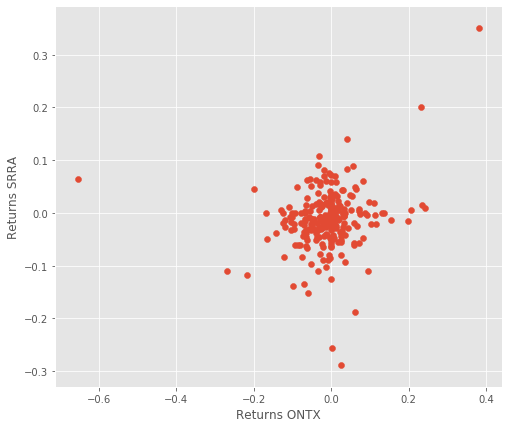

In [171]:
plt.scatter(calPerChange.ONTX, calPerChange.SRRA)
plt.xlabel('Returns ONTX')
plt.ylabel('Returns SRRA')

Text(0, 0.5, 'Returns IBIO')

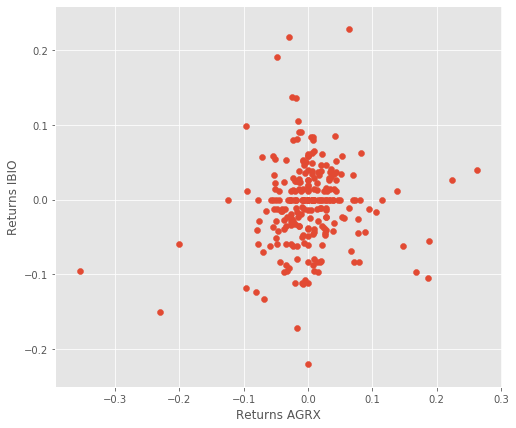

In [172]:
#########################
# One outlier, remove
#########################

calPerChange2 = calPerChange[calPerChange.IBIO < 1]

plt.scatter(calPerChange2.AGRX, calPerChange2.IBIO)
plt.xlabel('Returns AGRX')
plt.ylabel('Returns IBIO')

In [143]:
#########################
# some calculated values 
#########################

# calPerChange = (outDF.Close - outDF.Open)/outDF.Open
# calPerChange
# calPerChange = calPerChange.rename(columns={"IBIO": "PerChange"})
# list(outDF.columns) 

In [150]:
# calPerChange.pivot_table(index='Date',columns='Stock',values='PerChange',aggfunc='sum').plot()

In [91]:
#########################
# some calculated values 
#########################

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head()

Symbols,IBIO
Date,
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-08,NaN


In [96]:
#########################
# join DF's 
#########################

dfMerge = df.merge(calPerChange, left_on = 'Date', right_on = 'Date')
# list(dfMerge.columns)
dfMerge.tail()

,"(Adj Close, IBIO)","(Close, IBIO)","(High, IBIO)","(Low, IBIO)","(Open, IBIO)","(Volume, IBIO)",PerChange
Date,,,,,,,
2019-12-23,0.250,0.250,0.2700,0.2300,0.25,6314800.0,0.000000
2019-12-24,0.240,0.240,0.2500,0.2300,0.25,1628200.0,-0.040000
2019-12-26,0.230,0.230,0.2400,0.2200,0.23,2195500.0,0.000000
2019-12-27,0.230,0.230,0.2400,0.2200,0.23,2795500.0,0.000000
2019-12-30,0.253,0.253,0.2625,0.2301,0.24,5165363.0,0.054167


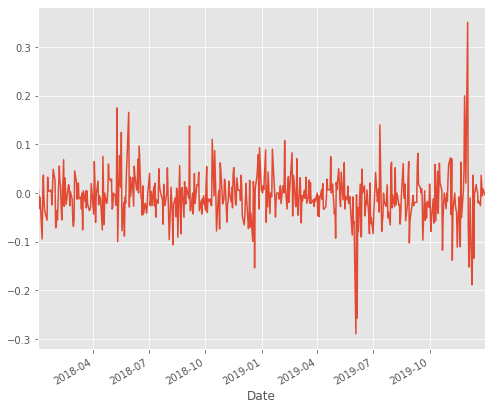

In [84]:
#########################
# create Chart
#########################

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# close_px.plot(label='AGRX')
# mavg.plot(label='Adj Close')
# plt.legend()

dfMerge.PerChange.plot()

In [87]:
dfMerge.tail()

,"(Adj Close, SRRA)","(Close, SRRA)","(High, SRRA)","(Low, SRRA)","(Open, SRRA)","(Volume, SRRA)",PerChange
Date,,,,,,,
2019-12-23,0.3380,0.3380,0.347,0.3210,0.347,1525800,-0.025937
2019-12-24,0.3420,0.3420,0.344,0.3210,0.330,1177000,0.036364
2019-12-26,0.3400,0.3400,0.344,0.3300,0.342,1040700,-0.005848
2019-12-27,0.3400,0.3400,0.345,0.3310,0.337,1350000,0.008902
2019-12-30,0.3388,0.3388,0.340,0.3253,0.340,1126159,-0.003529
